<a href="https://colab.research.google.com/github/Circle-vip/Yandex_practicum/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Описание проекта**


Вы — маркетинговый аналитик развлекательного приложения *Procrastinate Pro+*. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

## Шаг 1. Загрузите данные и подготовьте их к анализу


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Импортируем библиотеки, которые понадобятся
import pandas as pd
import numpy as np
import warnings 
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Чтобы окна об ошибках не мешали
warnings.filterwarnings('ignore')

In [ ]:
#выгрузила данные

visits, orders, costs = (
    pd.read_csv('/content/drive/MyDrive/Яндекс Практикум/Проект №5/visits_info_short.csv'), #посещения
    pd.read_csv('/content/drive/MyDrive/Яндекс Практикум/Проект №5/orders_info_short.csv'), #заказы
    pd.read_csv('/content/drive/MyDrive/Яндекс Практикум/Проект №5/costs_info_short.csv') #траты на рекламы
)

In [ ]:
def first_look (df):
    print('------- Первые 5 строк -------')
    display(df.head())
    print(' ')
    print(' ')
    print('------- Типы данных --------')
    print(df.info())
    print(' ')
    print(' ')
    print('--------- Пропуски -----------')
    count = 0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count=+1
        if count == 0:
            print('Пропусков НЕТ')
        print(' ')
        print(' ')   
        print('----------- Дубликаты -----------')
        if df.duplicated().sum() > 0:
            print('Дубликатов: ', df.duplicated().sum())
        else:
            print('Дубликатов НЕТ')

In [ ]:
first_look(visits)

------- Первые 5 строк -------


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


 
 
------- Типы данных --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
 
 
--------- Пропуски -----------
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ


In [ ]:
first_look(orders)

------- Первые 5 строк -------


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


 
 
------- Типы данных --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
 
 
--------- Пропуски -----------
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ


In [ ]:
first_look(costs)

------- Первые 5 строк -------


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


 
 
------- Типы данных --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
 
 
--------- Пропуски -----------
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ
Пропусков НЕТ
 
 
----------- Дубликаты -----------
Дубликатов НЕТ


In [ ]:
costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [ ]:
#привела названия к стандарту:
for i in visits, orders, costs:
    i.columns = i.columns.str.lower().str.replace(' ', '_')

#Привела типы столбцов к нужным:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs['month'] = pd.DatetimeIndex(costs['dt']).month

***Отчет по блоку:*** Данные приведены к нужным типам и названиям. Пропусков и дубликатов не обнаружено.

### get_profiles

In [ ]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### get_retention

In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_conversion

In [ ]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_ltv

In [ ]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### filter_data

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### plot_retention

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### plot_conversion

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### plot_ltv_roi

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

***Отчет по блоку:*** Выгрузила все ранее созданные функции, которые пригодятся для анализа и визуализации.

## Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [ ]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, orders['event_dt'], costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [ ]:
#Минимальная и максимальная дата привлечения пользоваетелй.
print('Первая дата привлечения пользователей: ', profiles['dt'].min())
print('Последняя дата привлечения пользователей: ', profiles['dt'].max())
print('Период исследования: ', profiles['dt'].max() - profiles['dt'].min())

Первая дата привлечения пользователей:  2019-05-01
Последняя дата привлечения пользователей:  2019-10-27
Период исследования:  179 days, 0:00:00


,region,payer,user_id,ratio
0,France,663,17450,0.037994
1,Germany,616,14981,0.041119
2,UK,700,17575,0.039829
3,United States,6902,100002,0.069019


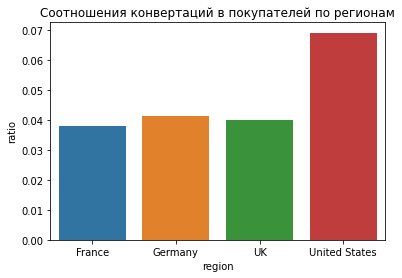

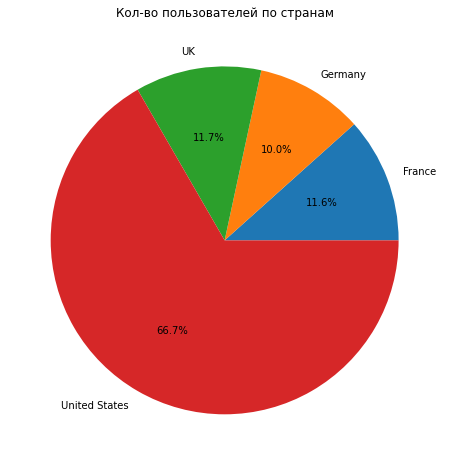

In [ ]:
#Определила какие регионы дают больше всего платящих пользователй
country = (
    profiles
    .sort_values(by=['user_id'])
    .groupby('region')
    .agg(
        {
            'payer': 'sum',
            'user_id': 'count',
            }
        )
        .reset_index()
)
country['ratio'] = country['payer'] / country['user_id']

display(country)

#Построила круговые диаграммы:

sns.barplot(x='region', y='ratio', data = country)
plt.title('Соотношения конвертаций в покупателей по регионам')
plt.show()


plt.figure(figsize=[8,8])
values = country['user_id'] 
labels = country['region'] 
plt.pie(values, labels=labels, autopct='%3.1f%%')
plt.title('Кол-во пользователей по странам')
plt.show()

,device,payer,user_id,ratio
0,Android,2050,35032,0.058518
1,Mac,1912,30042,0.063644
2,PC,1537,30455,0.050468
3,iPhone,3382,54479,0.062079


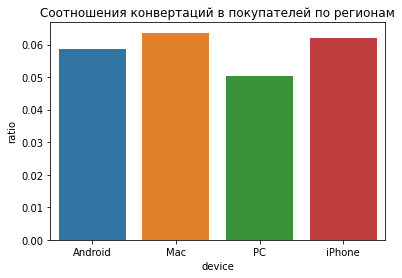

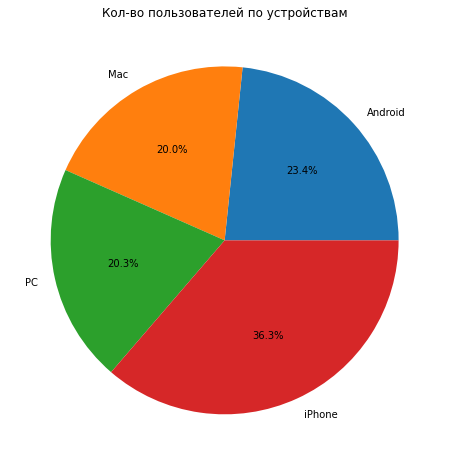

In [ ]:
#С каих устройств приходят больше всего платящих пользователей.
device = (
    profiles
    .sort_values(by=['user_id'])
    .groupby('device')
    .agg(
        {
            'payer': 'sum',
            'user_id': 'count',
            }
        )
        .reset_index()
)
device['ratio'] = device['payer'] / device['user_id']


display(device)


sns.barplot(x='device', y='ratio', data = device)
plt.title('Соотношения конвертаций в покупателей по регионам')
plt.show()

plt.figure(figsize=[8,8])
values = device['user_id'] 
labels = device['device'] 
plt.pie(values, labels=labels, autopct='%3.1f%%')
plt.title('Кол-во пользователей по устройствам')
plt.show()

,channel,payer,user_id,ratio
0,AdNonSense,440,3880,0.113402
1,FaceBoom,3557,29144,0.122049
2,LeapBob,262,8553,0.030633
3,MediaTornado,156,4364,0.035747
4,OppleCreativeMedia,233,8605,0.027077
5,RocketSuperAds,352,4448,0.079137
6,TipTop,1878,19561,0.096007
7,WahooNetBanner,453,8553,0.052964
8,YRabbit,165,4312,0.038265
9,lambdaMediaAds,225,2149,0.104700


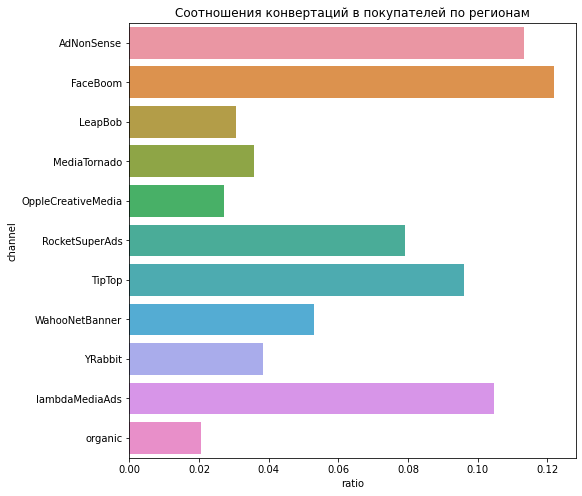

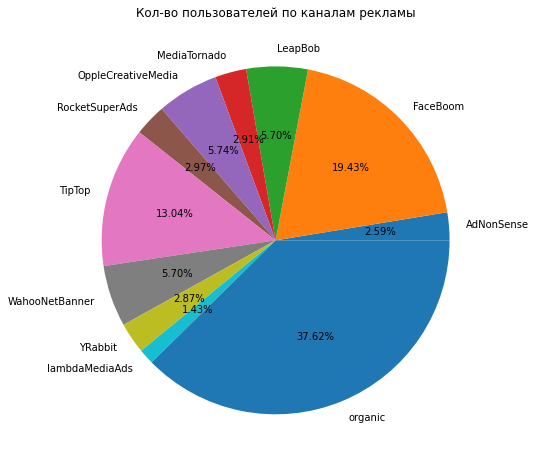

In [ ]:
#C каких каналов приходят пользователи  и с каких каналов приходят больше всего платящих пользователей.
channel = (
    profiles
    .sort_values(by=['user_id'])
    .groupby('channel')
    .agg(
        {
            'payer': 'sum',
            'user_id': 'count',
            }
        )
        .reset_index()
)
channel['ratio'] = channel['payer'] / channel['user_id']


display(channel)
plt.figure(figsize=[8,8])
sns.barplot(x='ratio', y='channel', data = channel)
plt.title('Соотношения конвертаций в покупателей по регионам')
plt.show()

plt.figure(figsize=[8,8])
values = channel['user_id'] 
labels = channel['channel'] 
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('Кол-во пользователей по каналам рекламы')
plt.show()

***Отчет по блоку:***  Анализ данных нам показал, что:

 - Больше всего пользователей пришли безо всякой рекламы. Лучшая конвертация из пользователей в покупателей -  в USA. Первое место, по кол-ву пользователей, с большим отрывом занимает тоже США.
 - Больше всего пользователей пользуются IPhone. Лучшую конвертацию в покупателей показывают пользователи с IPhone и PC.
 - Больше всего пользователей пришли с FaceBoom и TipTop. И FaceBoom показывает лучший процент конвертациив покупателей. Следом  идут AdNonSense, lambdaMediaAd и  TipTop.  Остальные каналы отстают с большим отрывом.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [ ]:
#Сколько денег потратили всего

print('Всего потратили на рекламу: ', costs['costs'].sum())

Всего потратили на рекламу:  105497.30000000002


,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


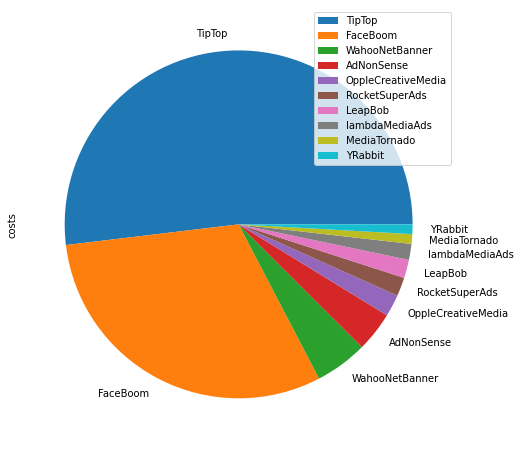

In [ ]:
#Сколько денег потратили на каждый канал

channel_costs = (
    costs
    .pivot_table(index='channel',  values='costs', aggfunc='sum')
    .sort_values(by= 'costs', ascending=False)
)
display(channel_costs)


channel_costs.plot(y='costs', kind='pie', figsize=(8,8))
plt.show()


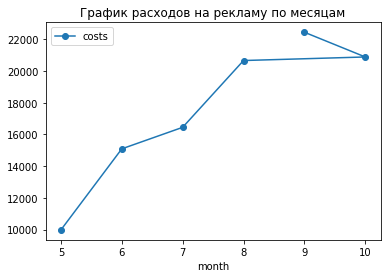

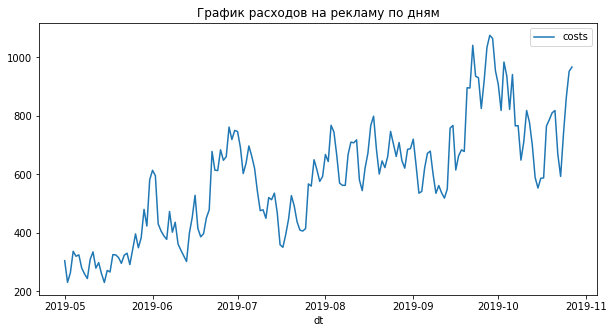

In [ ]:
#Сколько тратили по дням
date_costs = (
    costs
    .pivot_table(index='dt',  values='costs', aggfunc='sum')
    .sort_values(by='costs', ascending=False)
)

#Сколько тратили по месяцам
month_costs = (
    costs
    .pivot_table(index='month',  values='costs', aggfunc='sum')
    .sort_values(by='costs', ascending=False)
)

month_costs.plot(y='costs', style='o-')
plt.title('График расходов на рекламу по месяцам')
date_costs.plot(style='-', figsize=(10,5))
plt.title('График расходов на рекламу по дням');

In [ ]:
#сколько потратили денег на канал и сколько это дало покупателей
channel_grouped = profiles.pivot_table(index='channel', values=['acquisition_cost', 'payer'], aggfunc='sum')
channel_grouped

,acquisition_cost,payer
channel,,
AdNonSense,3911.25,440
FaceBoom,32445.60,3557
LeapBob,1797.60,262
MediaTornado,954.48,156
OppleCreativeMedia,2151.25,233
RocketSuperAds,1833.00,352
TipTop,54751.30,1878
WahooNetBanner,5151.00,453
YRabbit,944.22,165


In [ ]:
#Разделила кол-во покупателей на суммы.
channel_grouped = channel_grouped.div(channel_grouped['payer'], axis=0)
channel_grouped

,acquisition_cost,payer
channel,,
AdNonSense,8.889205,1.0
FaceBoom,9.121619,1.0
LeapBob,6.861069,1.0
MediaTornado,6.118462,1.0
OppleCreativeMedia,9.232833,1.0
RocketSuperAds,5.207386,1.0
TipTop,29.154047,1.0
WahooNetBanner,11.370861,1.0
YRabbit,5.722545,1.0


***Отчет по блоку:*** В сумме потратили 105497 рублей. Больше всего денег влили в рекламный канал TipTop  - 54751.30 рубля. И этот канал оказался самым дорогим по цене за одного покупателя - 29 рублей. Остальные же покупатели стоили компании от 5 до 11 рублей. Самый дешевый канал, по привлечению, оказался RocketSuperAds, но он не слишком популярен. Больше всего денег на рекламу потратили в сентябре.  В целом расходы на рекламу росли из месяца в месяц.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [ ]:
observation_date = datetime(2019, 9, 1).date() #момент анализа

In [ ]:
horizon_days = 14  #горизонт анализа

In [ ]:
profiles = profiles.query('channel != "organic"') #убираем Органик, потому что на них мы денег не тратили.

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

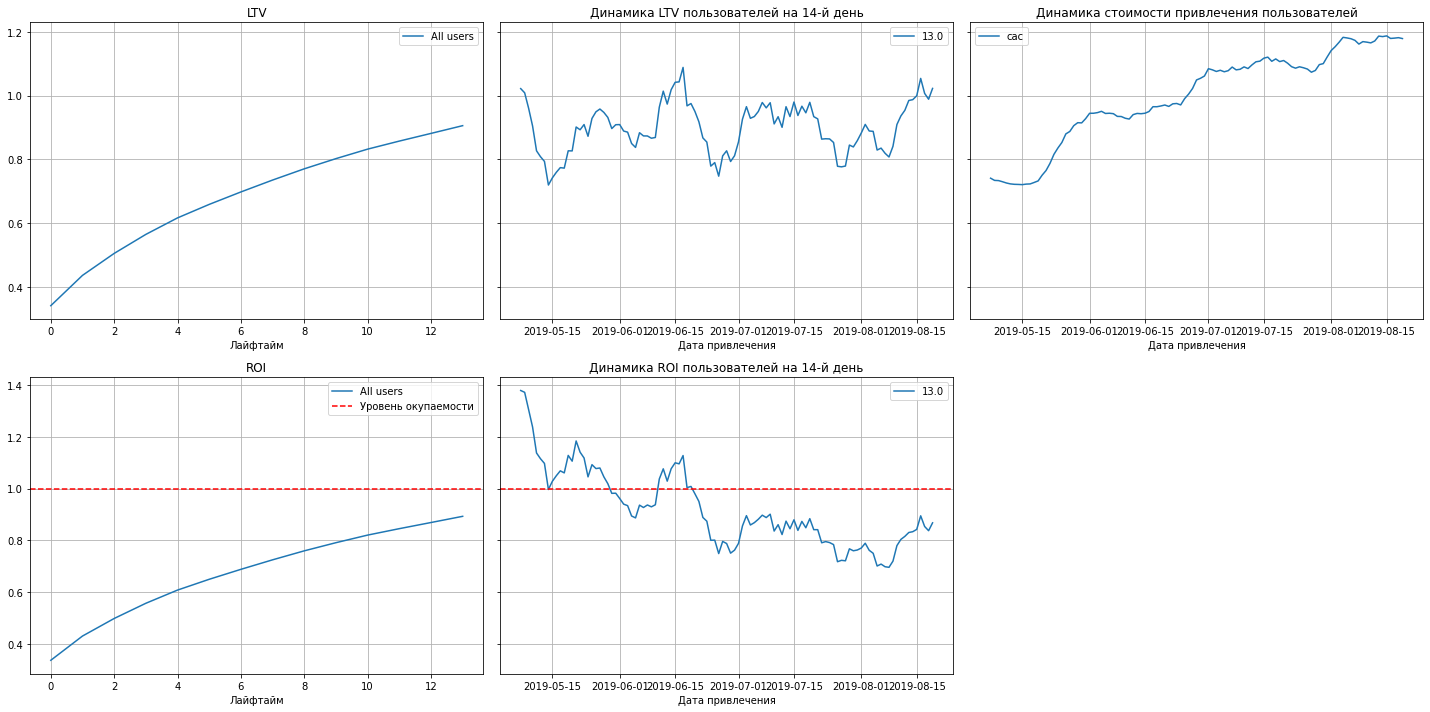

In [ ]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

***ВЫВОД:*** Из графиков видно что реклама не окупается. САС резко вырос с конца мая и все время рос. LTV стабилен.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

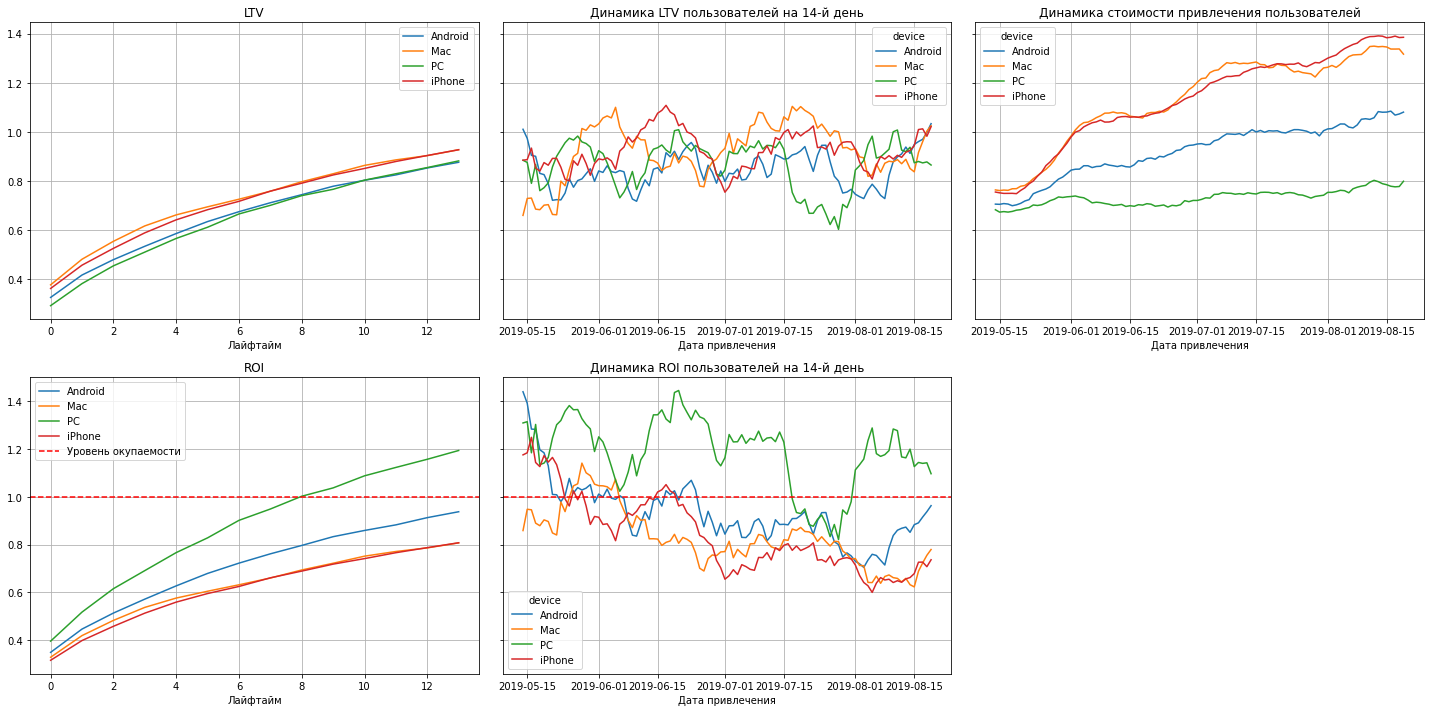

In [ ]:
# смотрим окупаемость с разбивкой по устройствам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

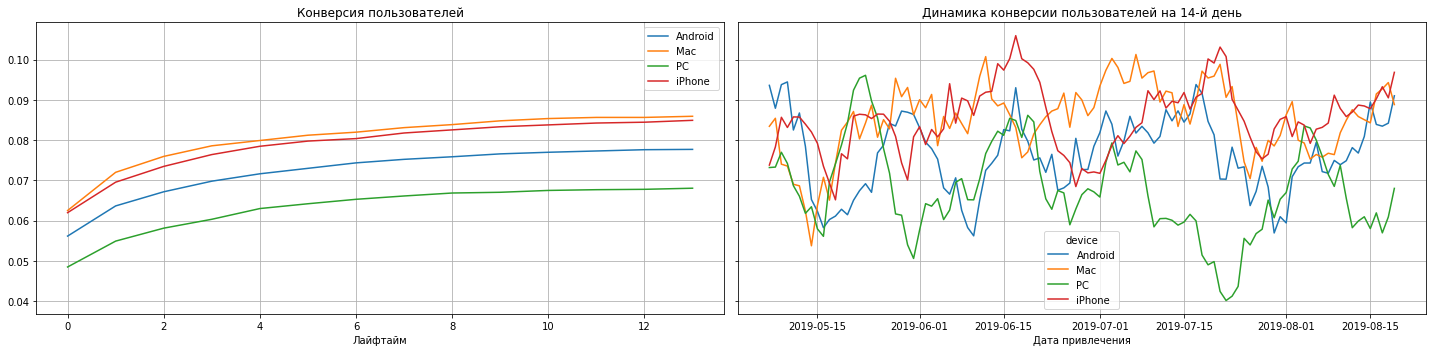

In [ ]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

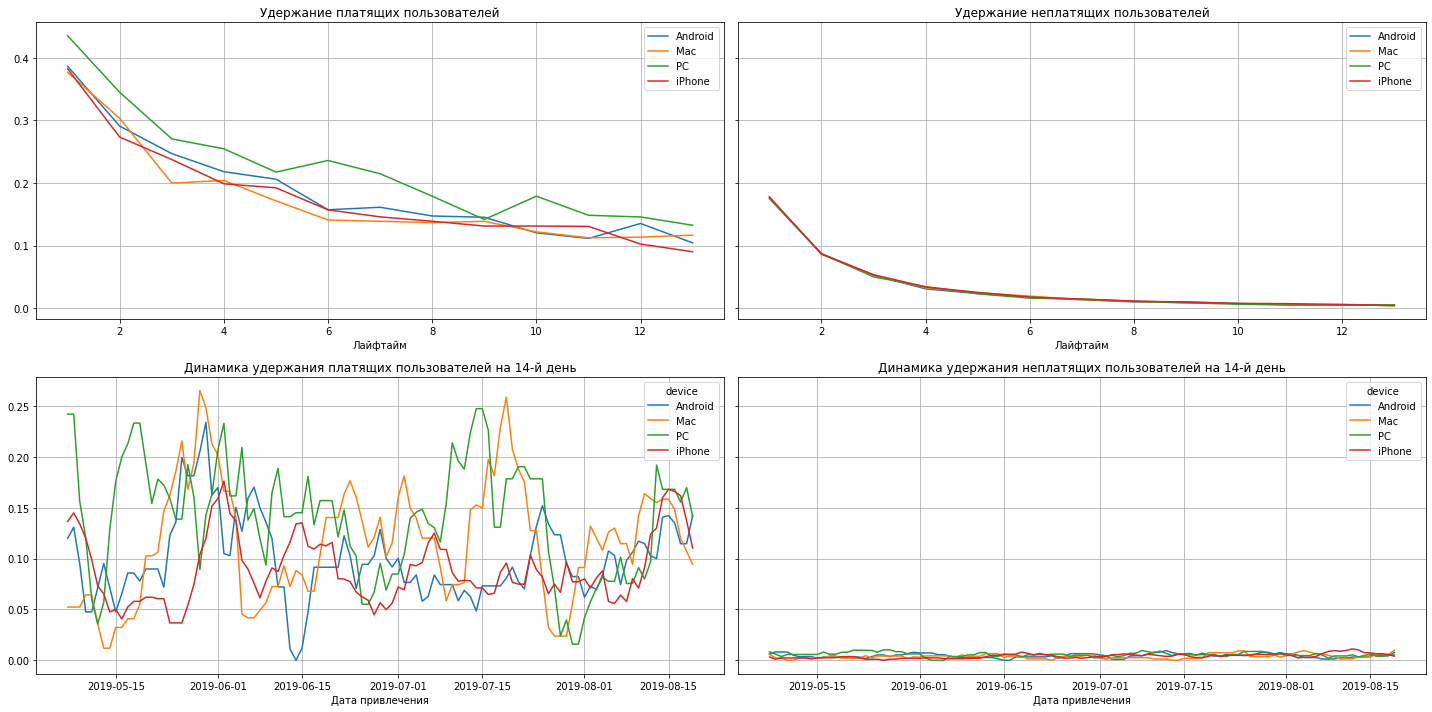

In [ ]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

***ВЫВОД:*** Из графиков видно, что реклама неокупается с теми кто пользуется IPhone, Mac и Android. Однако конверсия в покупателей у пользователей  IPhone и Mac стабильная и выше, чем у пользователей других устройств. И по CAC пользователи этих устройсвт оказались дороже других. LTV все так же стабилен у всех.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Обрати внимание, что удержание неплатящих пользователей из разных каналов, стран, платформ ровное, а удержание платящих очень отличается, как считаешь почему так?
</div>


### Проанализируйте окупаемость рекламы с разбивкой по странам

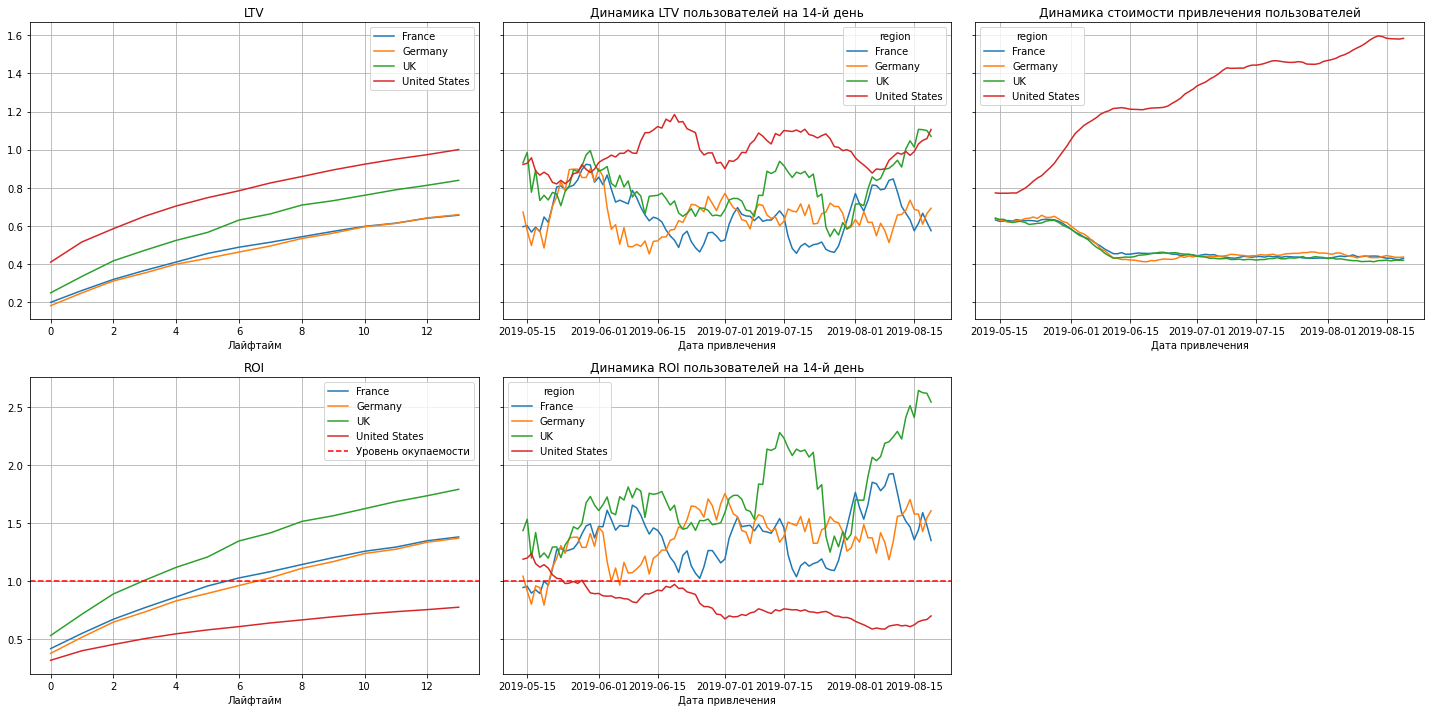

In [ ]:
# смотрим окупаемость с разбивкой по странам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

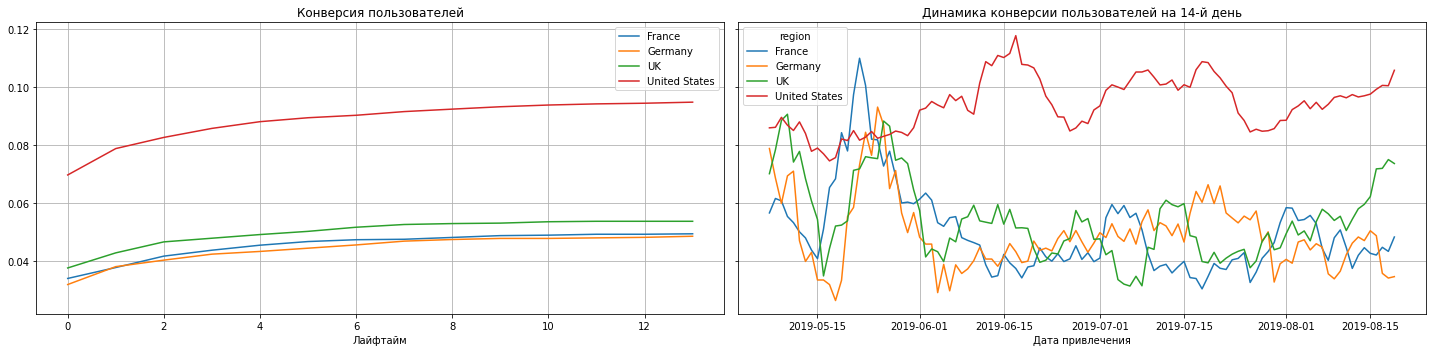

In [ ]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

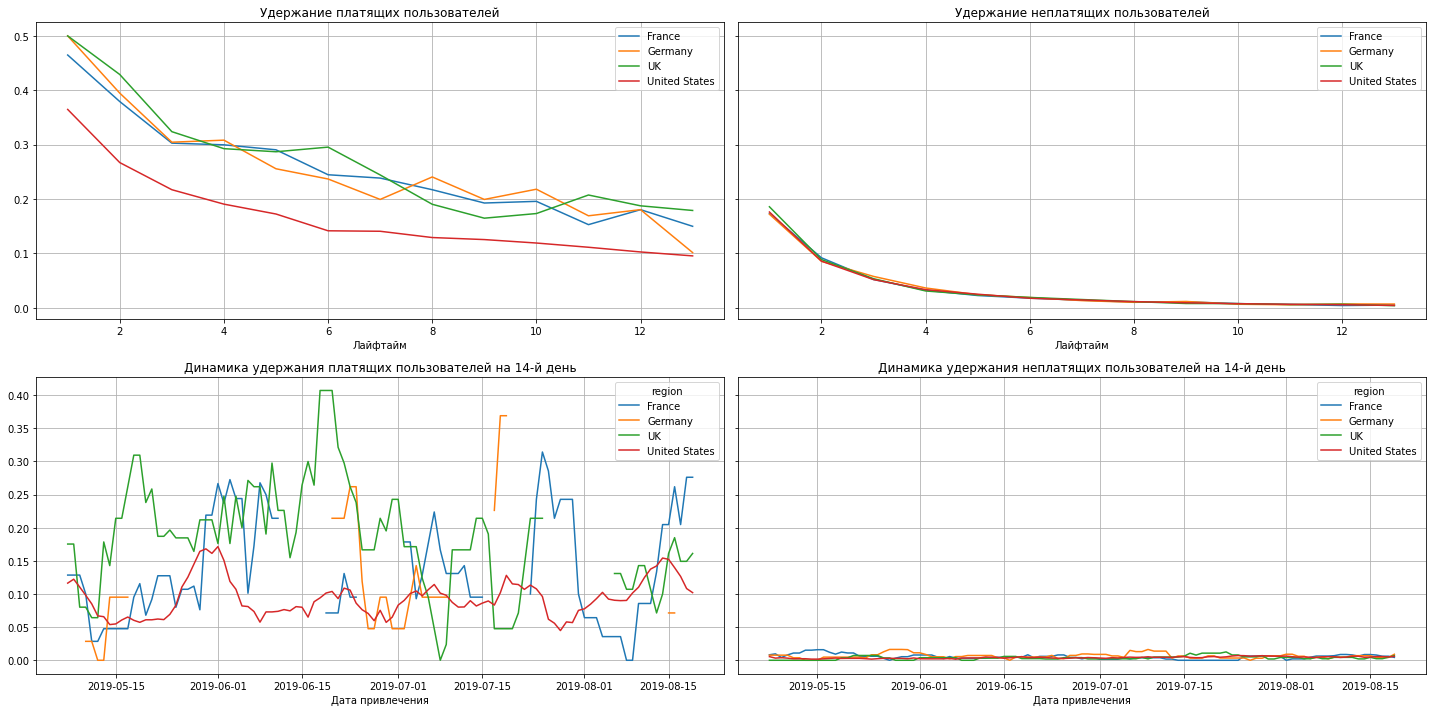

In [ ]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

***ВЫВОД:*** Из графиков видно, что реклама не окупается для пользователей из USA. И именно для пользователей из США стоимость привлечения покупателя резко подскочила с конца мая. Скорее всего опирались на конверсию пользователей в покупатели, она стабильна  и выше, чем у других стран. А вот удержание покупателей из США самое низкое. Значит дело в каком то баге или отзывах, или неудобстве использования приложения для граждан США. Еще, взможно, вложили деньги в какой то канал рекламы, который не популярен в США. 

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

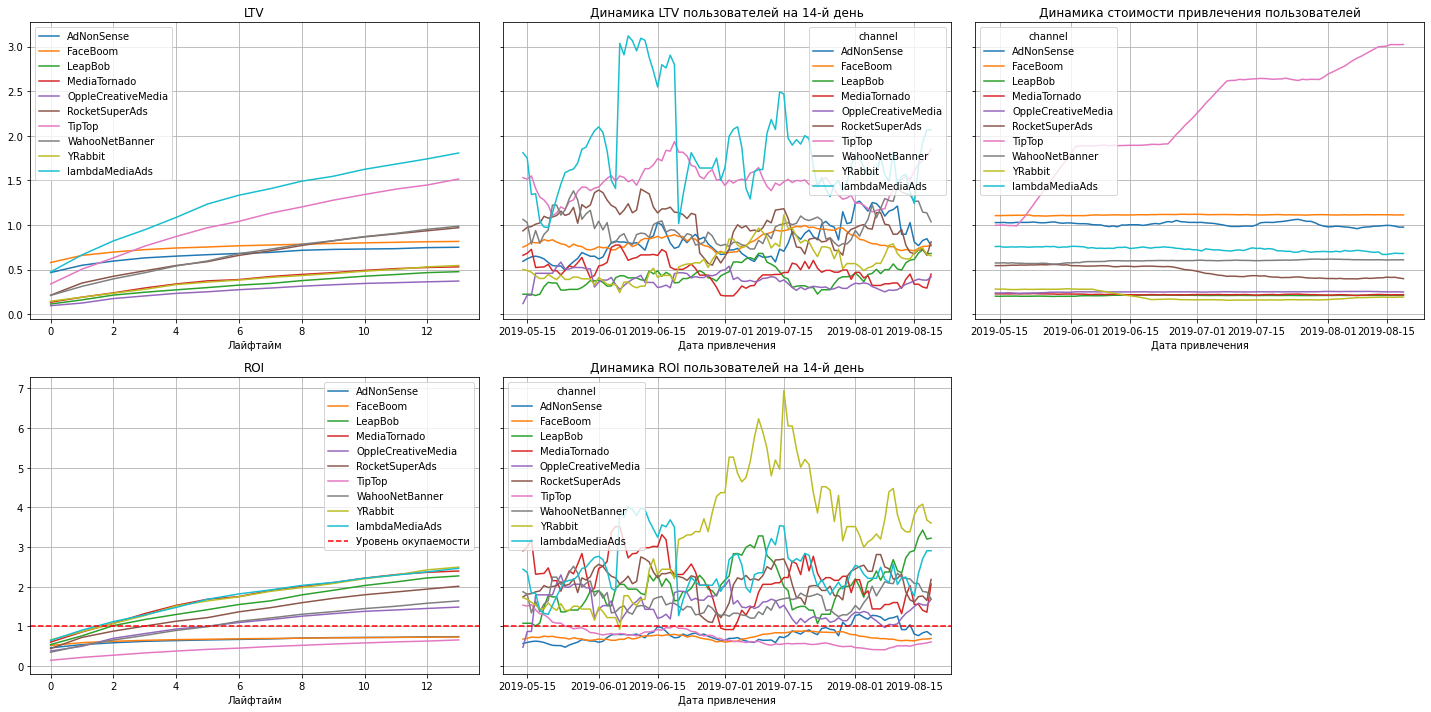

In [ ]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

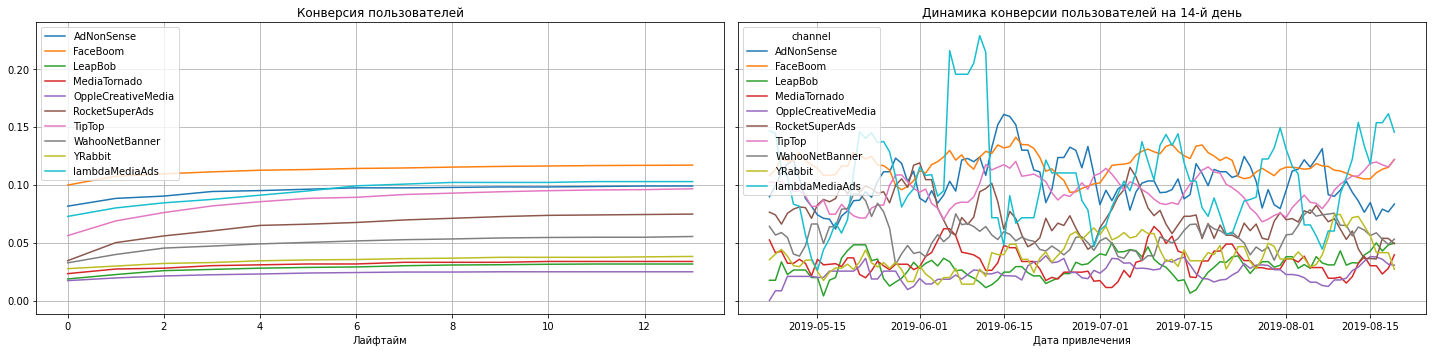

In [ ]:
# смотрим конверсию с разбивкой по каналам рекламы

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

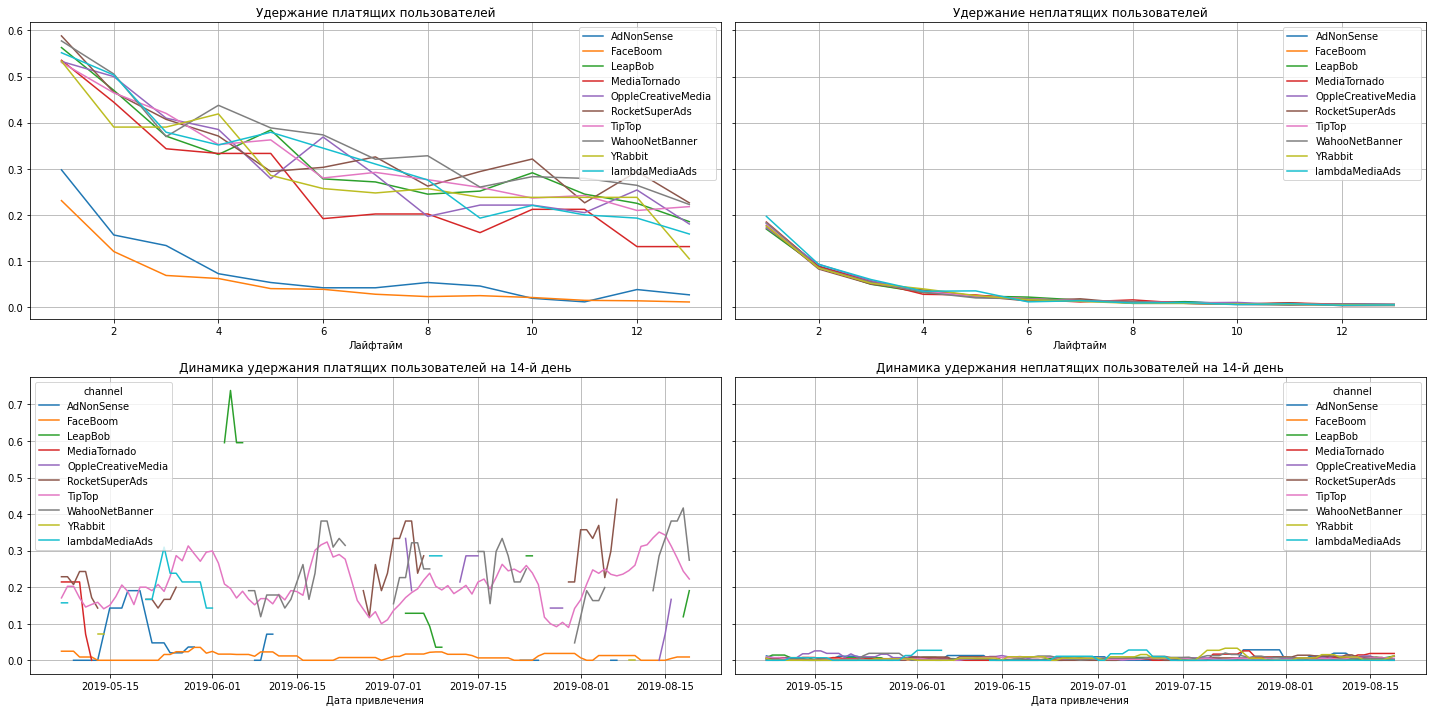

In [ ]:
# смотрим удержание с разбивкой по каналам рекламы

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

***ВЫВОД:*** Расходы на  каналы FaceBoom, TipTop и AdNonSense не окупаются. В TipTop, с мая, резко подросла стоимость привлечения покупателя, у остальных же каналов цена оставалось стабильной. Конверсия в пользователей у этих каналов самая высокая, однако удержание платящих пользователей  у FaceBoom и AdNonSense резко падает. 

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Из проведенного анализа я выявила несколько возможных причин неэфиктивности привлечения пользователей:

- Больше всего денег было потрачено на канал рекламы TipTop  и он оказался самым дорогим по цене привлечения одного покупателя и одним из самых неэффективных.

- Стоит также уделить внимание настройке рекламы по странам. Видно, что покупателей из США больше всего, однако стоимость их привлечения резко возросла практически с самого начала периода исследования и, как следствие, затраты на рекламу не окупились для этого региона. 

- Пользователеи с IPhone, Mac, Android так же не окупились.

Из графиков видно что LTV стабилен, а значит дело не в качестве пользователей. 

График САС пользователей с устройствами IPhone и Mac повторяет график САС с пользователями из США. Отсюда, делаю вывод, что большинство пользователей с IPhone и Mac из США, поэтому стоит искать причину неэффективности именно в том, что были неверно распределены деньги по каналам рекламы.

Так же, хочу заметить, что каналы FaceBoom  и AdNonSense занимают значительные доли в затратах на рекламу, но не приносят особого выхлопа. Конверсия с этих каналов высокая, а удержание низкое. Значит дело в содержании рекламы - возможно, было дано неверное представление продукта.

**Рекомендации:**

Нужно пересмотреть распределение финансов по каналам рекламы. Стоит выделить больше бюджета на каналы: FaceBoom, AdNonSense и LambdaMediaAds. И настроить таргет точнее, с учетом популярности каналов в регионах. 

